# 確率的バンディット問題の基礎知識

**参考サイト**

 - [［WEB］確率的バンディット問題の基礎知識 - SlideShare](https://www.slideshare.net/TakeruMaehara2/ml-professional-banditchapter2)
 - [［PDF］確率的バンディット問題の基礎知識 - SlideShare](./pdf/確率的バンディット問題の基礎知識.pdf)
 

**表記**

 - $X_{1},X_{2},\cdots$ : 独立・同一分布(i.i.d)に従う確率変数
 - $\mu = E\left(X_{i}\right)$ : 期待値
 - ${\sigma}^{2} = Var\left(X_{i}\right)$ : 分散
 - $\hat {\mu}_{n} = \frac {1}{n} \sum _{i=1}^{n}{X_{i}}$ : サンプル$n$個の標本平均

# 確率的バンディット問題における主要な問い

<div>
    <p style="text-align: center; font-size: 18px;">
        「<i>ある広告の現在のクリック率$\hat {\mu}$$(= \frac {1}{n} \sum _{i=i}^{n}{x_{i}}, x \in \left[0,1\right])$が0.05以下であるとき、<br><b>その広告の真のクリック率$\mu$が実は$\mu = 0.1$である可能性はどれくらいあるのだろうか？</b></i>」
    </p>
</div>

統計的仮説で書き表すと...

<p style="text-align: center; font-size: 18px;">
    「<i>真のクリック率が$\mu = 0.1$であるとき、<b>その標本平均$\hat {\mu}$が$\hat {\mu} \le 0.05$となる確率はどれくらいか？</b></i>」
</p>

上記の仮説を検証するために、確率値をどのように計算すればよいのか？

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
plt.rcParams['font.family'] = 'AppleGothic' #全体のフォントを設定
# plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15

## ①**中心極限定理**による確率近似を行い,計算する

> ### 中心極限定理(central limit theorem)
> 標準化された標本平均$\frac {\hat {\mu_{n}} - \mu}{ \sigma / \sqrt {n} }$の分布は標準正規分布に弱収束する。
> $$
\lim _{ n\rightarrow \infty  }{ P\left[ \frac { \hat { \mu _{ n } } -\mu  }{ \sigma /\sqrt { n }  } \le z \right]  } =\int _{ -\infty  }^{ z }{ \frac { 1 }{ \sqrt { 2\pi  }  } { e }^{ -\frac { { t }^{ 2 } }{ 2 }  }dt }
$$

In [62]:
from tqdm import tqdm


# 確率変数xがベルヌーイ分布に従うとする.

EPOCHS = 50000    # テスト回数
N            = 100000  # テスト1回あたりの標本サイズ
P            = 0.1      # ベルヌーイ分布の母平均
estimated_p_list = []  # 標本平均を保持するリスト

for i in tqdm(np.arange(EPOCHS)):
    # 標本をサンプリング
    x_arr = np.random.binomial(n=1, p=P, size=N)
    # 標本平均を計算
    estimated_p = np.sum(x_arr) / N
    estimated_p_list.append(estimated_p)

100%|██████████| 50000/50000 [01:42<00:00, 488.31it/s]


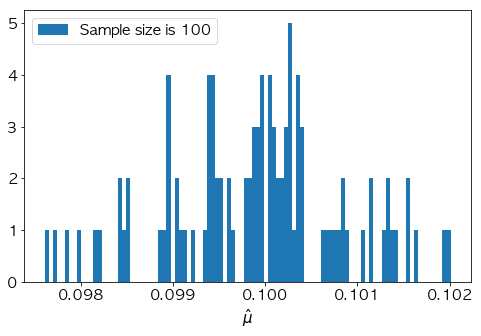

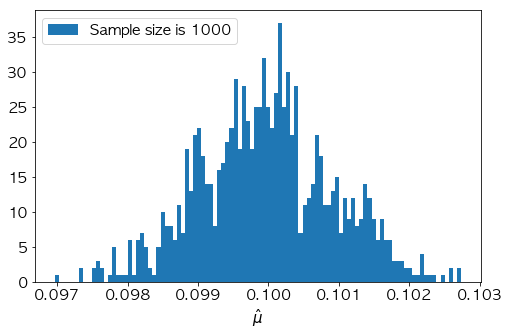

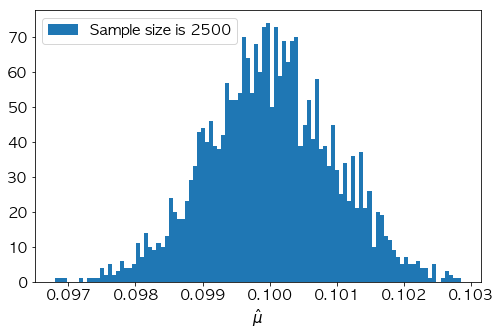

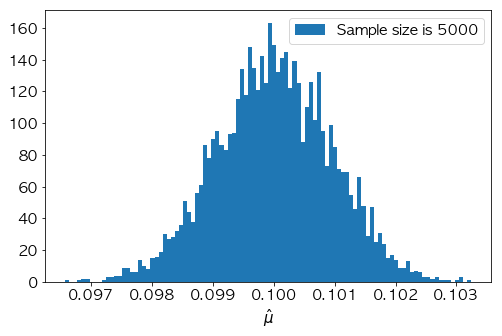

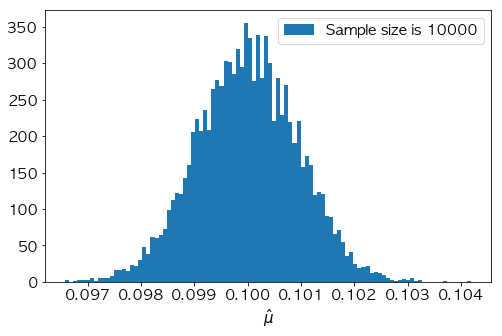

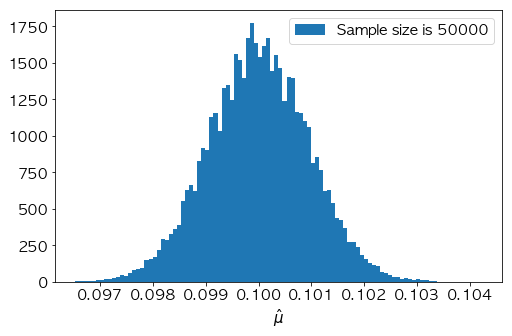

In [139]:
# plt.title('ベルヌーイ分布に従う確率変数$x$から標本平均$\hat {\mu}$を計算')
# plt.title('Random variable $x$ that is in accordance with the Bernoulli distribution.')

for size in [100, 1000, 2500, 5000, 10000, 50000]:
    plt.figure(figsize=(8, 5))
    plt.hist(estimated_p_list[:size], bins=100, label=['Sample size is {0}'.format(size)])
    plt.xlabel('$\hat {\mu}$')
    plt.legend()
    plt.savefig('./../docs/imgs/02/sample_size_is_{0}.jpg'.format(size))
    plt.show()

### 確率値の計算

<p style="text-align: center; font-size: 18px;">
    「<i>真のクリック率が$\mu = 0.1$であるとき、<b>その標本平均$\hat {\mu}$が$\hat {\mu} \le 0.05$となる確率はどれくらいか？</b></i>」
</p>

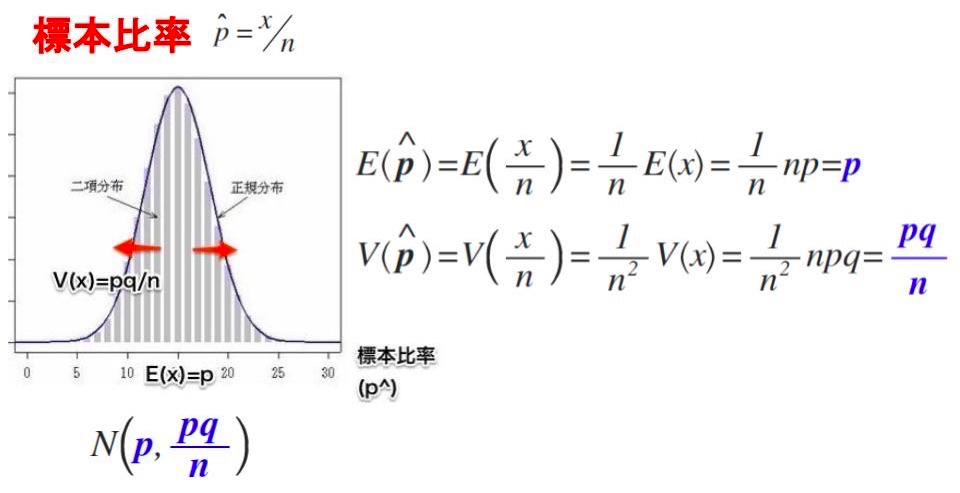

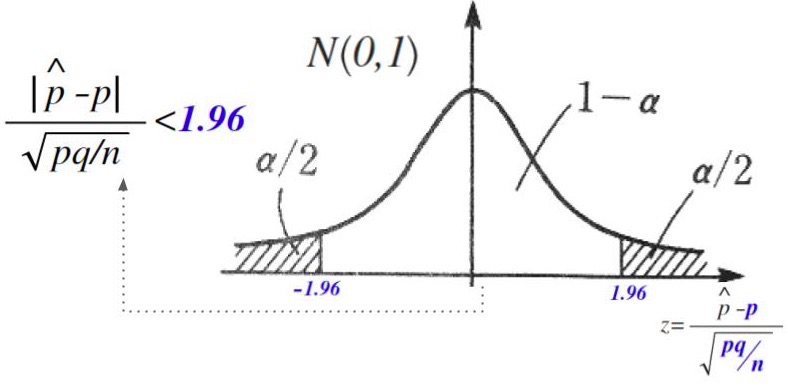

標本平均$\hat {\mu}$が$\hat {\mu} \le 0.05$である確率は、中心極限定理を用いて以下になる。
$$
\frac {\left| \hat {\mu}_{n} - \mu \right|}{\sqrt { \mu \left( 1 - \mu \right) / n }} \le 3.73
$$

このとき、推定の誤差$E = \left| \hat {\mu} - \mu \right|$を値$E$以内にしたいとする。その場合、必要な標本数は、
$$
\begin{eqnarray}
\frac {\left| \hat {\mu}_{n} - \mu \right|}{\sqrt { \mu \left( 1 - \mu \right) / n }} & = & 3.73\\
n & = & \left( \frac { 3.73 }{ E } \right)^{2} \mu \left( 1 - \mu \right)
\end{eqnarray}
$$
となる。

$z > 1.96$になる確率を誤差1%以内で推定した場合に必要となる標本数

In [87]:
print(round(((1.96/0.01)**2) * 0.1 * 0.9))

3457


$z > 3.73$になる確率を誤差1%以内で推定した場合に必要となる標本数

In [86]:
print(round(((3.73/0.01)**2) * 0.1 * 0.9))

12522


このように、中心極限定理は比較的高確率で起こる事象の確率を近似するには大変便利だが、例えば「**標本平均が真の期待値$\mu$から大幅にずれる確率$P\left(\hat {\mu} \le 0.05; \mu = 0.1\right)$**」というように、**低頻度で起こる事象の確率を小さな誤差**で評価するには、膨大なサンプル数が必要となるため、適切ではありません。

## [裾確率]②**ヘフディングの不等式**から計算

低頻度で発生する事象の確率(**裾確率**)の評価式で最も単純なものの1つが**<font color="blue">ヘフディングの不等式</font>**(Hoeffding's inequality)です.

> ### ヘフディングの不等式
> i.i.d.確率変数$X_{i} \in \left[0,1\right]$と任意の$\Delta > 0$に対して
> $$
P\left[ \hat {\mu}_{n} \le \mu - \Delta \right] \le e^{-2n\Delta^{2}}\\
P\left[ \hat {\mu}_{n} \ge \mu + \Delta \right] \le e^{-2n\Delta^{2}}
$$
> が成り立つ.
> 
> <img src="./../docs/imgs/02/ヘフディングの不等式.jpg" width="70%">

この不等式から、標本平均$\hat {\mu}_{n}$が真の平均$\mu$から$\Delta$以上ずれる確率は標本数$n$の増加に対して指数関数的に減少することがわかる.<br>
また、この指数$2 \Delta^{2}$は$X_{i}$の分布および$\mu$に依存しない量としてはこれ以上改善できない.  **これらの依存性を許した場合にはより精度のよい評価が可能で、それが次にチェルノフ・ヘフディングの不等式(Chernoff-Hoeffding's inequality)です.**

**参考サイト**

 - http://ibisforest.org/index.php?Hoeffding%E3%81%AE%E4%B8%8D%E7%AD%89%E5%BC%8F
 - http://mathcommunication.hatenablog.com/entry/2017/06/27/001722
 - https://maea2.github.io/ineqalities/
 - http://seetheworld1992.hatenablog.com/entry/2017/06/04/150253

標本平均$\hat {\mu}_{n}$が真の平均$\mu = 0.1$から$\Delta = 0.05$以上ずれる確率は、$\mathrm {exp}\left( -2 n \Delta^{2} \right)$以下になる.

In [152]:
for n in range(1, 1001, 1):
    p = np.exp(-2*n*(0.05)**2)
    if n % 100 == 0:
        print('Probability is less than {0:.3f} (n = {1})'.format(p, n))

Probability is less than 0.607 (n = 100)
Probability is less than 0.368 (n = 200)
Probability is less than 0.223 (n = 300)
Probability is less than 0.135 (n = 400)
Probability is less than 0.082 (n = 500)
Probability is less than 0.050 (n = 600)
Probability is less than 0.030 (n = 700)
Probability is less than 0.018 (n = 800)
Probability is less than 0.011 (n = 900)
Probability is less than 0.007 (n = 1000)


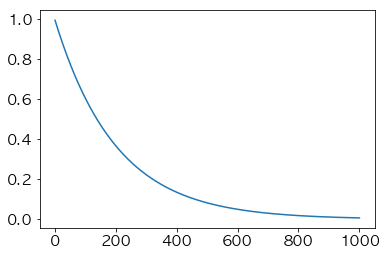

In [132]:
n = np.arange(1, 1001, 1)
p = np.exp(-2*n*(0.05)**2)

plt.plot(n , p)
plt.legend()
plt.show()

## [裾確率]③**チェルノ・ヘフディングの不等式**から計算

> ### KLダイバージェンス(KL, カルバック・ライブラー)
> 離散値をとる確率分布$P$に対して確率質量関数$P\left(a\right) = P_{X \sim P}{\left[ X = a \right]}$と表記するとき、分布$P,Q$のKLダイバージェンスは、
> $$
D\left( {P} \| {Q} \right) = E_{X \sim P}{\left[ \log {\frac { P\left( X \right) }{ Q\left( X \right) }} \right]} = \sum _{x}{P\left(x\right) \log {\frac {P\left(x\right)}{Q\left(x\right)}}}
$$
> と定義されます. ただし、本書では$\log$はすべて自然対数を表すことにし、$\log {1/0} = \infty$, $\log {\infty} = 0$と定義する.<br>
>
> 連続値をとる確率変数に対しては、確率質量関数を確率密度関数に、和を積分に置き換えることにより同様に定義できる.
> $$
D\left( { P }\| { Q } \right) =E_{ X\sim P }{ \left[ \log { \frac { P\left( X \right)  }{ Q\left( X \right)  }  }  \right]  }=\int _{ x }{ P\left( x \right) \log { \frac { P\left( x \right) }{ Q\left( x \right) }  }  } 
$$

KLダイバージェンスは対称性$D\left({ P }\|{ Q }\right) = D\left({ Q }\|{ P }\right)$を満たさないため厳密な意味での距離ではありませんが、直感的には分布間の距離の二乗に対応する量であり、**全変動距離**(total variation distance)
$$
{\left\| P - Q \right\|}_{1} = \frac {1}{2} \sum _{x}{\left| P\left(x\right) - Q\left(x\right) \right|}
$$
に対して
$$
D\left({P}\|{Q}\right) \ge 2 {\left\| P - Q \right\|}_{1}^{2}
$$
が成り立つことが**ピンスカーの不等式**(Pinsker's inequality)として知られています.

期待値$p$をもつベルヌーイ分布を$\mathrm {Ber}\left(p\right)$と表し、ベルヌーイ分布間のKLダイバージェンスを
$$
d\left(p,q\right) = D\left( { \mathrm {Ber}\left(p\right) }\|{ \mathrm {Ber}\left(q\right) } \right) = p\log {\frac {p}{q}} + (1 - p) \log {\frac {1 - p}{1 - q}}
$$
と表記するとき、次が成り立ちます.

> ### チェルノフ・ヘフディングの不等式
> i.i.d.確率変数$X_{i} \in \left[0,1\right]$および任意の$0 \le x \le \mu$に対して
> $$
P\left[ \hat {\mu}_{n} \le x \right] \le e^{-n \cdot d\left( x,\mu \right)}
$$
> が成り立ち、また任意の$\mu \le x \le 1$に対して
$$
P\left[ \hat {\mu}_{n} \ge x \right] \le e^{-n \cdot d\left( x,\mu \right)}
$$
> が成り立つ.

ここでピンスカーの不等式より
$$
d\left( x,\mu \right) \ge 2 \left( x - \mu \right)^{2}
$$
であり、チェルノフ・ヘフディングの不等式がヘフディングの不等式より精密な上界を与えていることがわかります.

In [210]:
for n in range(1, 1001, 1):
    kl = 0.1*np.log(0.1/0.05) + 0.9*np.log(0.9/0.95)
    p = np.exp(-n*kl)
    if n % 50 == 0:
        print('Probability is less than {0:.4f} (n = {1})'.format(p, n))

Probability is less than 0.3560 (n = 50)
Probability is less than 0.1268 (n = 100)
Probability is less than 0.0451 (n = 150)
Probability is less than 0.0161 (n = 200)
Probability is less than 0.0057 (n = 250)
Probability is less than 0.0020 (n = 300)
Probability is less than 0.0007 (n = 350)
Probability is less than 0.0003 (n = 400)
Probability is less than 0.0001 (n = 450)
Probability is less than 0.0000 (n = 500)
Probability is less than 0.0000 (n = 550)
Probability is less than 0.0000 (n = 600)
Probability is less than 0.0000 (n = 650)
Probability is less than 0.0000 (n = 700)
Probability is less than 0.0000 (n = 750)
Probability is less than 0.0000 (n = 800)
Probability is less than 0.0000 (n = 850)
Probability is less than 0.0000 (n = 900)
Probability is less than 0.0000 (n = 950)
Probability is less than 0.0000 (n = 1000)


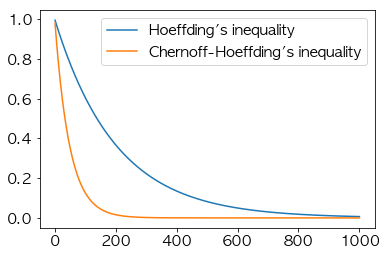

In [158]:
n = np.arange(1, 1001, 1)
p1 = np.exp(-2*n*(0.05)**2)

kl = 0.1*np.log(0.1/0.05) + 0.9*np.log(0.9/0.95)
p2 = np.exp(-n*kl)

plt.plot(n , p1, label="Hoeffding's inequality")
plt.plot(n, p2, label="Chernoff-Hoeffding's inequality")
plt.legend()
plt.show()

## [大偏差原理]④**サノフの定理**から計算

以上の不等式は標本平均についての裾確率を指数関数の形で上から抑えるものだったが、**より一般的な結果として標本平均ではなく標本分布そのものに対して同様の確率評価を行うものがあります.**

表記

 - 確率分布$P$からのサンプル$n$個の標本分布(経験分布) : $\hat {P}_{n}$

例えば、$P$をベルヌーイ分布とし、$X_{i} = 1$なるサンプルが$m$個、$X_{i} = 0$なるサンプルが$n - m$個だった場合、その経験分布$\hat {P}_{n}$はベルヌーイ分布$\mathrm {Ber}\left(m/n\right)$となります. このように定義される経験分布$\hat {P}_{n}$に対して次のサノフの定理が成り立ちます.

> ### サノフの定理(Sanov's theorem)
> この定理は、$\hat {P}_{n} \approx Q$という事象、すなわち「**分布$P$からのサンプル$n$個があたかも分布$Q$からのものであるように振る舞う**」という事象の確率が
> $$
\mathrm {P}\left[ \hat {P}_{n} \approx Q \right] \approx e^{-n D\left( {Q} \| {P} \right)}
$$
> と評価できることを表す.

このように低確率で起きる事象の確率を指数関数の形で評価する理論体型を**大偏差原理**(large deviation principle)と呼ぶ.

ex) 期待値$\mu = 0.1$のベルヌーイ分布$P$からのサンプル$n$個があたかも期待値$\mu = 0.05$のベルヌーイ分布からのものであるように振る舞う($\hat {P}_{n} \approx Q$となる)確率は？

In [211]:
p1 = 0.1
p2 = 0.05

D = p1*np.log(p1/p2) + (1-p1)*np.log((1-p1)/(1-p2))
for n in [10, 50, 100, 150, 200, 250, 300, 350]:
    print('[sample size is {0}] {1:.5f}'.format(n, np.exp(-n*D)))

[sample size is 10] 0.81339
[sample size is 50] 0.35604
[sample size is 100] 0.12676
[sample size is 150] 0.04513
[sample size is 200] 0.01607
[sample size is 250] 0.00572
[sample size is 300] 0.00204
[sample size is 350] 0.00073


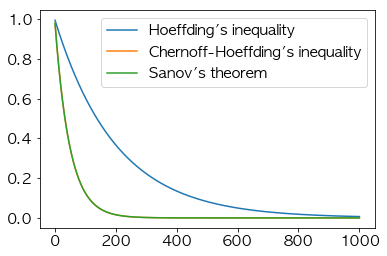

In [208]:
n = np.arange(1, 1001, 1)
p1 = np.exp(-2*n*(0.05)**2)

kl = 0.1*np.log(0.1/0.05) + 0.9*np.log(0.9/0.95)
p2 = np.exp(-n*kl)

p3 = np.exp(-n*kl)

plt.plot(n , p1, label="Hoeffding's inequality")
plt.plot(n, p2, label="Chernoff-Hoeffding's inequality")
plt.plot(n, p3, label="Sanov's theorem")
plt.legend()
plt.show()